<a href="https://colab.research.google.com/github/PabloDome/Fisica2/blob/main/Fisica2_CampoElectrico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1 - Graficar el campo en función de la posición (x,y)**

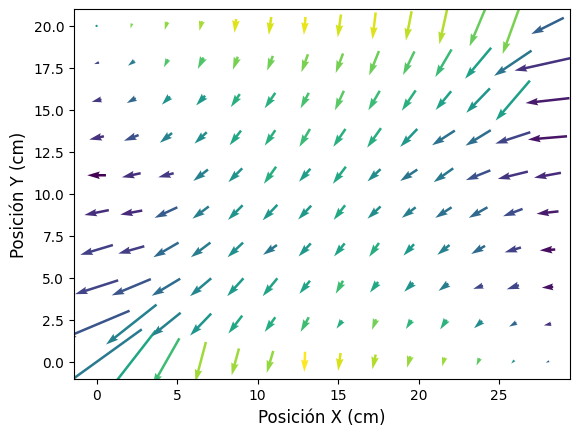

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Armo la grilla para graficar con Meshgrid
x, y = np.meshgrid(np.linspace(0, 28, 14),
                   np.linspace(0, 20, 10))

# Asigno los voltajes a cada uno de los puntos en la grilla
u = -np.loadtxt('Ej-Volt-y', dtype=float)/2
v = -np.loadtxt('Ej-Volt-x', dtype=float)/2

# Grafico con quiver
plt.quiver(x, y, u, v, np.arctan(v/u), pivot='mid',color='g')

plt.ylabel('Posición Y (cm)', fontsize = 12)
plt.xlabel('Posición X (cm)', fontsize = 12)
plt.show()

**Modelo de las diferencias de potencial para: $$\frac{q}{2 \pi \epsilon _0} = 1$$**

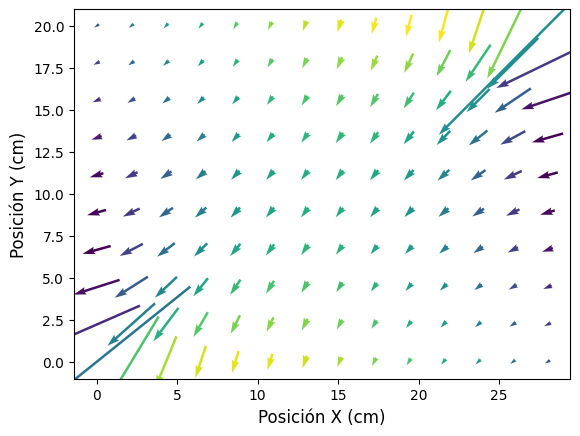

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Modelo del potencial
def ModeloCampo(Px,Py,Qx,Qy):

    Rx = Qx-Px
    Ry = Qy-Py
    r = np.sqrt(Rx*Rx + Ry*Ry)

    dVx = Rx/pow(r,3)
    dVy = Ry/pow(r,3)

    return dVx, dVy


Q1 = (30,22)
Q2 = (-2,-2.5)

# Meshgrid
x, y = np.meshgrid(np.linspace(0, 28, 14),
                   np.linspace(0, 20, 10))

u1 = x*0
u2 = x*0
v1 = x*0
v2 = x*0

for i in range(10):
    for j in range(14):
        v1[i,j], u1[i,j] = ModeloCampo(x[i,j],y[i,j], Q1[0], Q1[1])
        v2[i,j], u2[i,j] = ModeloCampo(x[i,j],y[i,j], Q2[0], Q2[1])

u = - u1 + u2
v = - v1 + v2

plt.quiver(x, y, u, v, np.arctan(v/u), pivot='mid',color='g')

plt.ylabel('Posición Y (cm)', fontsize = 12)
plt.xlabel('Posición X (cm)', fontsize = 12)
# Show plot with grid
plt.show()